# Part A: Data Exploration and Baseline Model [10 points]
1. Load and Analyze the Dataset: Load the creditcard.csv dataset. This dataset has already been pre-processed using PCA, so no feature engineering is required. [1]
2. Analyze Class Distribution: Print the class distribution (count of fraudulent vs. non-fraudulent transactions). A pie chart or bar plot would be a good visualization. Clearly state the degree of imbalance. [2]
3. Baseline Model:
    - Split the original dataset into training and testing sets. Crucially, ensure the test
set retains its original imbalance. [2]
    - Train a Logistic Regression classifier on the imbalanced training data. This will be your Model 1. [2]
    - Evaluate the model's performance on the test set. Pay close attention to metrics robust to imbalance, such as Precision Recall, and the F1-score for the minority (fraudulent) class. Explain why accuracy is a misleading metric in this scenario. [3]

how do you compose the clustering algorithm such that classification works better

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Analyze Dataset

Load the creditcard.csv dataset. This dataset has already been pre-processed using PCA, so no feature engineering is required. 

In [112]:
dataset = pd.read_csv("datasets/creditcard.csv")

In [113]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [114]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Looks like the dataset is centered. It is also known from the dataset description that PCA has been applied to the dataset. This means the first feature `V1` is the first principal component with maximum explained variance

In [115]:
dataset["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This clearly shows data imbalance.

##  Analyze Class Distribution

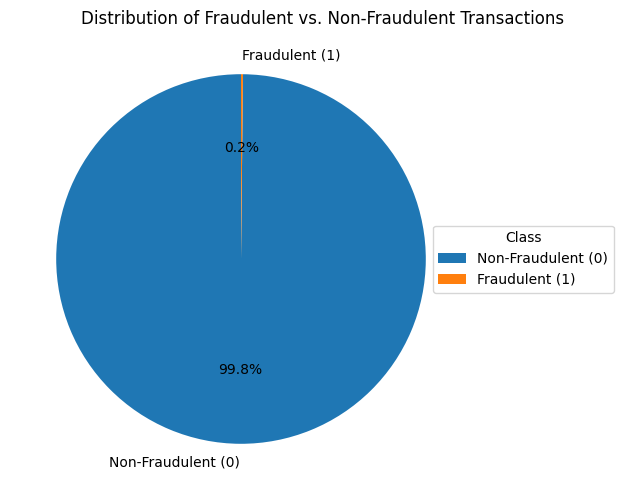

In [116]:
class_counts = dataset['Class'].value_counts()
labels = ['Non-Fraudulent (0)', 'Fraudulent (1)']

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions', loc="right", pad=1, x=1.2)
plt.legend(loc='center left', bbox_to_anchor=(0.9, 0.5), title='Class')

In [117]:
print("Class Distribution:")
print(class_counts)
print("*"*50)
imbalance_ratio = class_counts[0] / class_counts[1] if 1 in class_counts else 'Infinite (no fraud cases)'
print(f"Degree of Imbalance: {imbalance_ratio:.2f}:1 (Non-Fraud:Fraud)")

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64
**************************************************
Degree of Imbalance: 577.88:1 (Non-Fraud:Fraud)


The degree of imbalance `577.88:1 (Non-Fraud:Fraud)` is very high

In [118]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'dataset' is your pandas DataFrame with the 'Class' column (0 for non-fraud, 1 for fraud)
class_counts = dataset['Class'].value_counts()
total_transactions = len(dataset)

labels = ["All Transactions", "Non-Fraud", "Fraud"]
source = [0, 0]  # All transactions split into non-fraud and fraud
target = [1, 2]  # Non-fraud and fraud nodes
value = [class_counts[0], class_counts[1]]  # Actual counts for non-fraud and fraud

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=5,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(
    title_text="Transactions to Fraudulent vs. Non-Fraudulent Transactions",
    font_size=11,
    width=500,
    height=400
)
fig.show()

These analyses show clearly how imbalanced the dataset is.

##  Baseline Model

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [120]:

X = dataset.drop("Class", axis=1)
y = dataset.pop("Class")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, shuffle=True,
                                                    stratify=y)

In [121]:
baseline_model_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [122]:
baseline_model_pipeline.fit(X_train, y_train)

y_pred = baseline_model_pipeline.predict(X_test)

Text(0.5, 1.02, 'Confusion Matrix of Baseline Model')

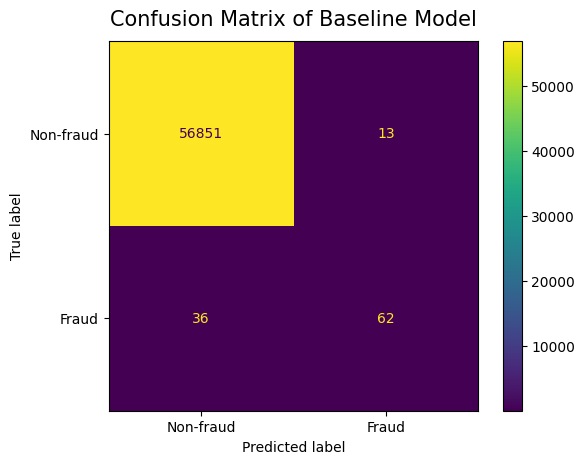

In [148]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Non-fraud", "Fraud"])
plt.title("Confusion Matrix of Baseline Model",  fontsize=15, y=1.02)

In [149]:
precision_base_model = precision_score(y_test, y_pred)
recall_base_model = recall_score(y_test, y_pred)
accuracy_base_model = accuracy_score(y_test, y_pred)
f1_base_model = f1_score(y_test, y_pred)

print("The metrics of the baseline model for predicting Fraudulent transactions are: ", end='\n\n')
print("Accuracy : ", accuracy_base_model)
print("Precision : ", precision_base_model)
print("Recall : ", recall_base_model)
print("F1 Score : ", f1_base_model)

The metrics of the baseline model for predicting Fraudulent transactions are: 

Accuracy :  0.9991397773954567
Precision :  0.8266666666666667
Recall :  0.6326530612244898
F1 Score :  0.7167630057803468


This shows very clearly that the model is very effective in terms of accuracy and has fairly decent precision. But looking at recall, the model is not effective at all. Here are a few specific observations that signify this.

1. Accuracy close to 1 signifies that accuracy is highly influenced by the number of datapoints
    - This wrongly indicates that the model is doing great
2. Precision of ~0.83 shows that out of all the datapoints predicted to be fraud, only ~83% of them were actually fraud. 
    - Which again is not bad but it is not representative of the truth
3. Recall of ~0.63 shows that out of all the fraudulent transactions, only ~63% of them were correctly predicted as fraud by the model.
    - This is the most relevant metric of all as it clearly shows the real performance of the model.
    - It is important because we care far more about finding fraudulent transactions than we do about non-fraudulent ones
4. F1 score is a function of precision and recall.
    - It also isn't very indicative of the model performance but definitely does a better job than accuracy.

This is also clear from the confusion matrix. 

# Part B: Resampling Approaches [25 points]
1. Naive Oversampling (SMOTE): [5]
    - Apply the SMOTE (Synthetic Minority Over-sampling Technique) algorithm to the training data. This method generates synthetic samples for the minority class. [3]
    - Explain how SMOTE works and its potential limitations, such as generating noisy samples if the minority class is not well-defined. [2]
    - Citation: N. V. Chawla, K. W. Bowyer, L. O. Hall, and W. P. Kegelmeyer, "SMOTE: Synthetic Minority Over-sampling Technique," Journal of Artificial Intelligence Research, vol. 16, pp. 321–357, 2002.
2. Clustering-Based Oversampling (CBO): [10]
    - Explain the concept of using clustering for oversampling to ensure diversity and explain how it achieves this goal. [2]
    - Use a clustering algorithm, such as K-Means, to identify a few clusters within the training data of the minority class only. You can choose k based on intuition or the Elbow Method. [5]
    - Oversample from each minority cluster to create a new, balanced dataset. The goal is to ensure that all sub-groups are well-represented, thereby avoiding the creation of synthetic samples in regions with no actual data. [3]
3. Clustering-Based Undersampling (CBU): [5]
    - Explain the concept of using clustering for undersampling. The idea is to find sub-groups within the majority class and strategically remove instances to maintain a representative sample while reducing its size. [2]
    - Use a clustering algorithm to find clusters within the training data of the majority class only. [5]
    - Undersample from each cluster. For instance, you could remove samples from clusters that are closer to the minority class, or you could simply undersample each cluster proportionally to its size to preserve the original distribution of the majority class. [3]
    - The final training set will comprise all instances of the minority class and the selected subset of majority class instances.

Note: Libraries like imblearn provide convenient implementations for both SMOTE and clustering-based resampling methods, such as ClusterCentroids for undersampling.

# Part C: Model Comparison and Analysis [15 points]
1. Train and Evaluate Models: [5]
    - Model 2 (SMOTE): Train a Logistic Regression classifier on the training data balanced with SMOTE. Evaluate its performance on the same, imbalanced test set from Part A.
    - Model 3 (CBO): Train a Logistic Regression classifier on the training data balanced with your clustering-based oversampling approach. Evaluate its performance on the same, imbalanced test set.
    - Model 4 (CBU): Train a Logistic Regression classifier on the training data balanced with your clustering-based undersampling approach. Evaluate its performance on the same, imbalanced test set.
2. Performance Comparison [5]: Create a summary table or bar chart comparing the Precision, Recall, and F1-score of the four models (Baseline, SMOTE, CBO, and CBU) for the minority class.
3. Conclusion and Recommendations: [5]
    - Discuss the benefits and drawbacks of each resampling method for this problem. Which method performed the best and why?
    - Explain how the clustering-based approaches address the limitations of a naive method like SMOTE.
    - Conclude with a recommendation on which resampling strategy the company should adopt.